#无监督学习-聚类算法：K均值-kMeans

In [2]:
from numpy import *

def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float,curLine) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids

In [3]:
datMat=mat(loadDataSet('testSet.txt'))
print min(datMat[:,0])
print min(datMat[:,1])
print max(datMat[:,0])
print max(datMat[:,1])

[[-5.379713]]
[[-4.232586]]
[[4.838138]]
[[5.1904]]


In [17]:
randCent(datMat,2)

matrix([[ 3.34671244,  3.99084673],
        [-1.32838595, -3.64880838]])

In [18]:
distEclud(datMat[0],datMat[1])

5.184632816681332

In [49]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        #print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean
    return centroids, clusterAssment

In [116]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
def plotSca(myMat):
    #print myMat[:,0].flatten().A[0]
    #print myMat[:,1].flatten().A[0]
    fig=plt.scatter(myMat[:,0].flatten().A[0],myMat[:,1].flatten().A[0],s=30,c='blue')
    #fig=plt.scatter(myMat[:,1].flatten().A[0],myMat[:,0].flatten().A[0],s=20,c='red')

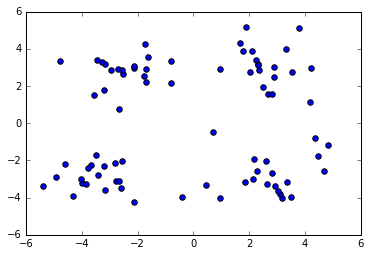

In [117]:
plotSca(datMat)

In [118]:
myCentroids,clustAssing=kMeans(datMat,4)

In [119]:
print myCentroids

[[-3.53973889 -2.89384326]
 [ 2.65077367 -2.79019029]
 [ 2.6265299   3.10868015]
 [-2.46154315  2.78737555]]


In [120]:
print clustAssing.A[1]
print datMat.A[1]
print myCentroids[1].flatten().A[0]
print distEclud(datMat.A[1],myCentroids[1].flatten().A[0])

[3.         1.39004893]
[-3.453687  3.424321]
[ 2.65077367 -2.79019029]
8.711176186437205


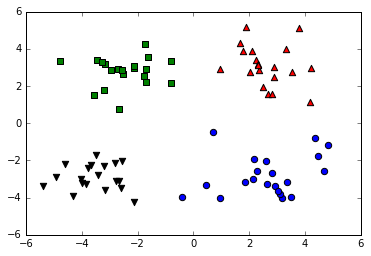

In [121]:
Colors={1:'blue',2:'red',3:'green',0:'black'}
Markers={1:'o',2:'^',3:'s',0:'v'}
for i in range(datMat.A.shape[0]):
    fig=plt.scatter(datMat.A[i][0],datMat.A[i][1],s=40,c=Colors[clustAssing.A[i][0]],marker=Markers[clustAssing.A[i][0]])

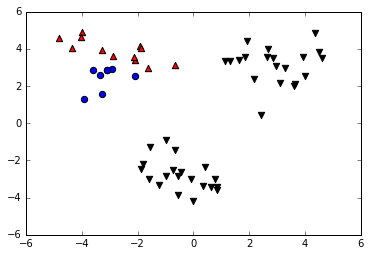

In [163]:
datMat2=mat(loadDataSet('testSet2.txt'))
myCentroids,clustAssing=kMeans(datMat2,3)
for i in range(datMat2.A.shape[0]):
    fig=plt.scatter(datMat2.A[i][0],datMat2.A[i][1],s=40,c=Colors[clustAssing.A[i][0]],marker=Markers[clustAssing.A[i][0]])

In [167]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m):#calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:]
            #get the data points currently in cluster i
            
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])
            #compare the SSE to the currrent minimum
            
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print "sseSplit, and notSplit: ",sseSplit,sseNotSplit
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print 'the best Cent To Split is: ',bestCentToSplit
        print 'the len of bestClustAss is: ', len(bestClustAss)
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]
        #replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss
        #reassign new clusters, and SSE
    return mat(centList), clusterAssment

sseSplit, and notSplit:  570.7227574246755 0.0
the best Cent To Split is:  0
the len of bestClustAss is:  60
sseSplit, and notSplit:  68.68654812621844 38.06295063565756
sseSplit, and notSplit:  27.193667836261877 532.6598067890178
the best Cent To Split is:  0
the len of bestClustAss is:  40


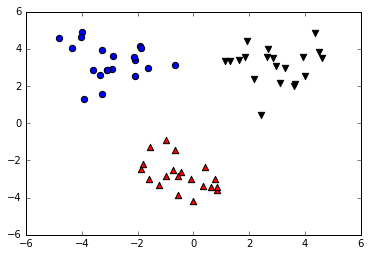

In [203]:
datMat3=mat(loadDataSet('testSet2.txt'))
myCentroids,clustAssing=biKmeans(datMat3,3)
for i in range(datMat3.A.shape[0]):
    fig=plt.scatter(datMat3.A[i][0],datMat3.A[i][1],s=40,c=Colors[clustAssing.A[i][0]],marker=Markers[clustAssing.A[i][0]])

#书中的雅虎api地址不存在

In [232]:
def loadDapi(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')[-2:]
        #name = "".join(line.strip().split('\t')[:-2])
        fltLine = map(float,curLine) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

In [240]:
geoResults=loadDapi('places.txt')
#print geoResults
myMat = mat(geoResults)
#print myMat

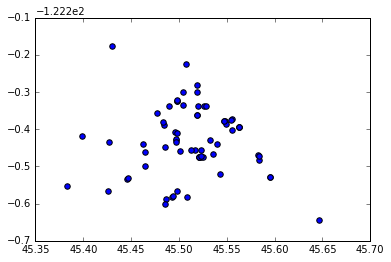

In [248]:
plotSca(myMat)

In [243]:
def distSLC(vecA, vecB):#Spherical Law of Cosines
    a = sin(vecA[0,1]*pi/180) * sin(vecB[0,1]*pi/180)
    b = cos(vecA[0,1]*pi/180) * cos(vecB[0,1]*pi/180) * \
                      cos(pi * (vecB[0,0]-vecA[0,0]) /180)
    return arccos(a + b)*6371.0 #pi is imported with numpy

def clusterClubs(numClust=5):
    datList = []
    for line in open('places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

sseSplit, and notSplit:  3043.2633158892286 0.0
the best Cent To Split is:  0
the len of bestClustAss is:  69
sseSplit, and notSplit:  1379.8222402641015 851.4388885907233
sseSplit, and notSplit:  494.9842506844967 2191.824427298505
the best Cent To Split is:  0
the len of bestClustAss is:  39
sseSplit, and notSplit:  263.1537684139341 1680.9549600947348
sseSplit, and notSplit:  494.9842506844967 1379.8222402641015
sseSplit, and notSplit:  595.5374698152546 1401.7450573508136
the best Cent To Split is:  1
the len of bestClustAss is:  30
sseSplit, and notSplit:  214.8844497192629 1324.500322188508
sseSplit, and notSplit:  313.4964174057988 1389.6574919824407
sseSplit, and notSplit:  366.6566471872081 1045.2904194445869
sseSplit, and notSplit:  2.2994326551573563 1864.9712392302592
the best Cent To Split is:  2
the len of bestClustAss is:  20
sseSplit, and notSplit:  223.51299072245578 861.6408978717047
sseSplit, and notSplit:  267.8272584595327 926.7980676656376
sseSplit, and notSplit: 

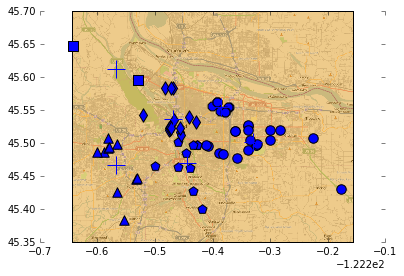

In [250]:
clusterClubs(6)